In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from sklearn.preprocessing import normalize
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### GLOBAL VARIABLES

In [16]:
DATAPATH = 'data/features/'
NJOBS = -1
SEED = 10

### LOAD DATASET

In [6]:
train_features = np.load(DATAPATH+'X_features_002.npy')

In [7]:
train_features.shape

(1532, 1273)

### NORMALIZE DATASET

In [8]:
data_scaled = normalize(train_features)

### PLOT ELBOW

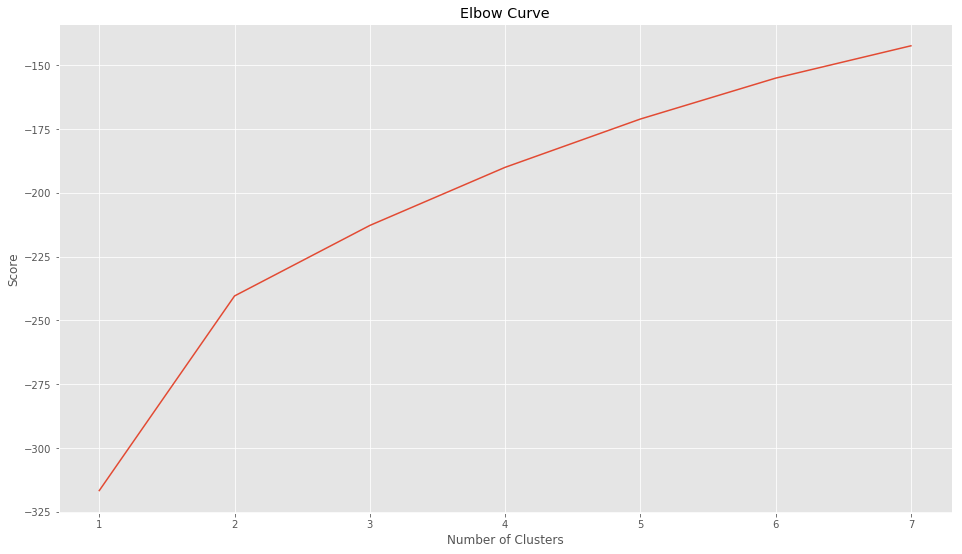

In [28]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i, n_jobs=NJOBS, random_state=SEED) for i in Nc]
kmeans
score = [kmeans[i].fit(data_scaled).score(data_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xticks([i for i in Nc])
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### PLOT SILHOUETTE 

For n_clusters = 2 The average silhouette_score is : 0.22791214917951244
For n_clusters = 3 The average silhouette_score is : 0.19051656085719335
For n_clusters = 4 The average silhouette_score is : 0.20305827177547853
For n_clusters = 5 The average silhouette_score is : 0.20235758615638644
For n_clusters = 6 The average silhouette_score is : 0.18440583137535277
For n_clusters = 7 The average silhouette_score is : 0.189608592917013


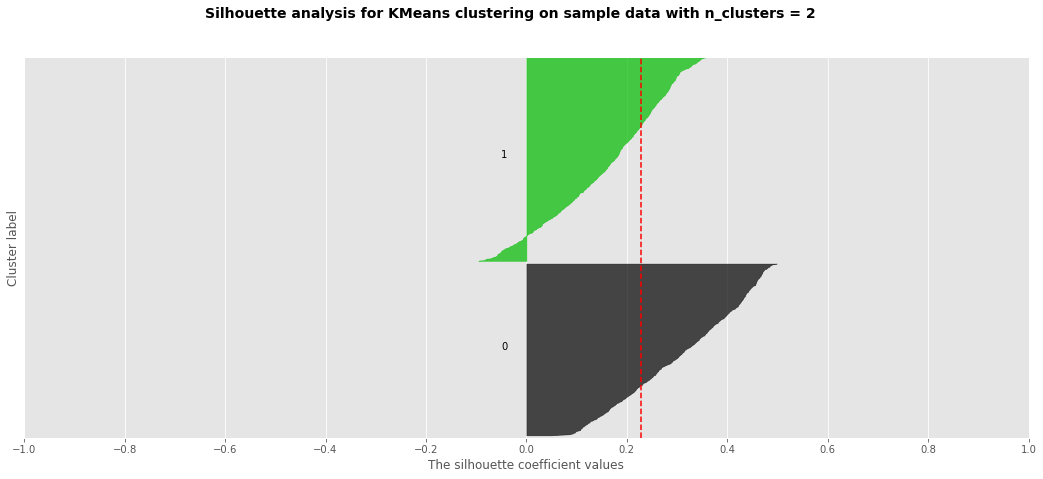

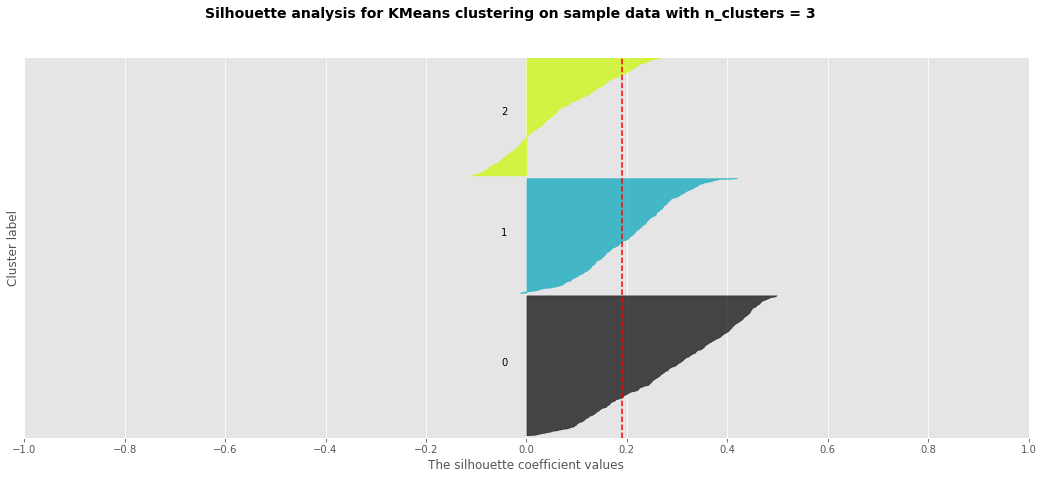

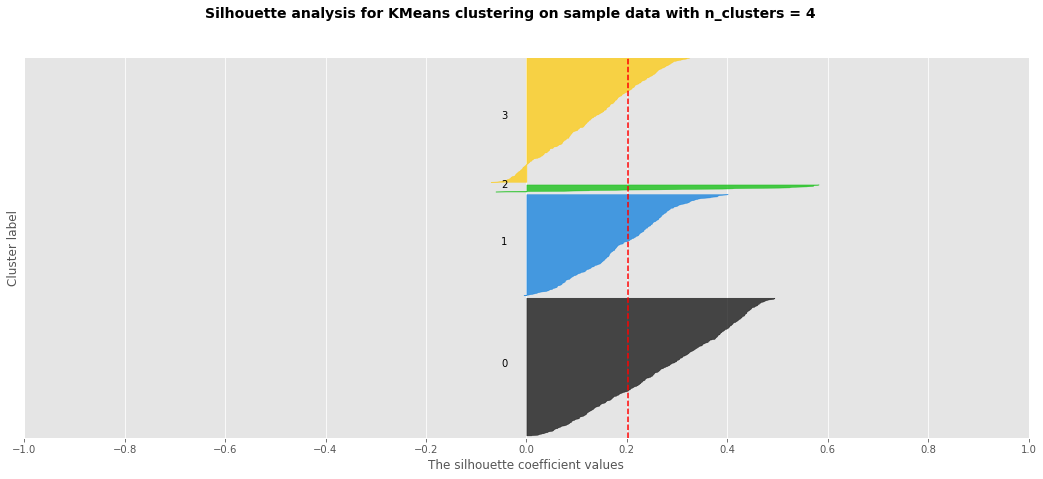

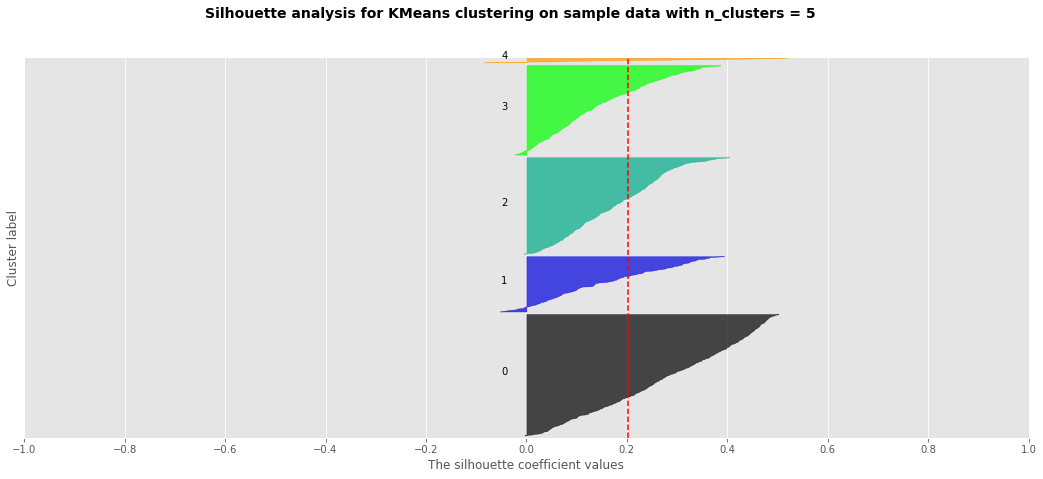

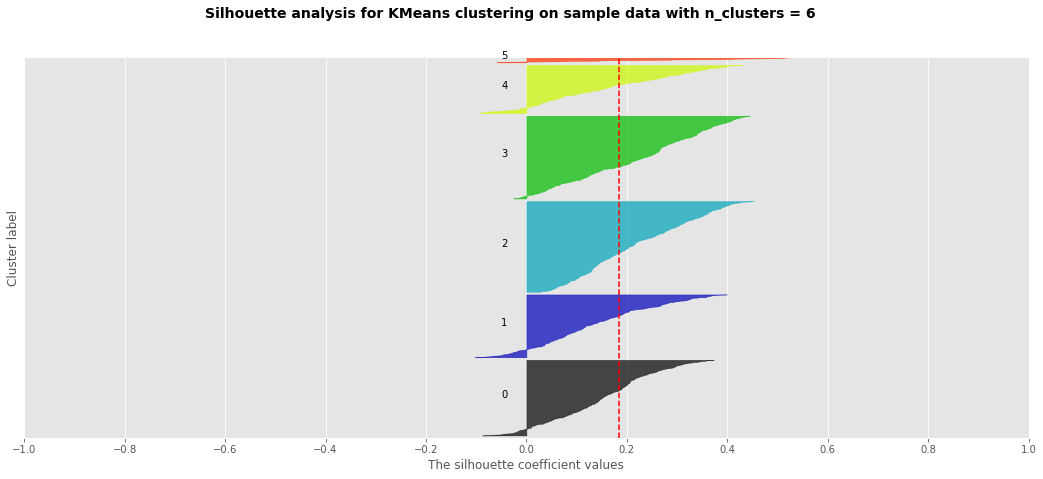

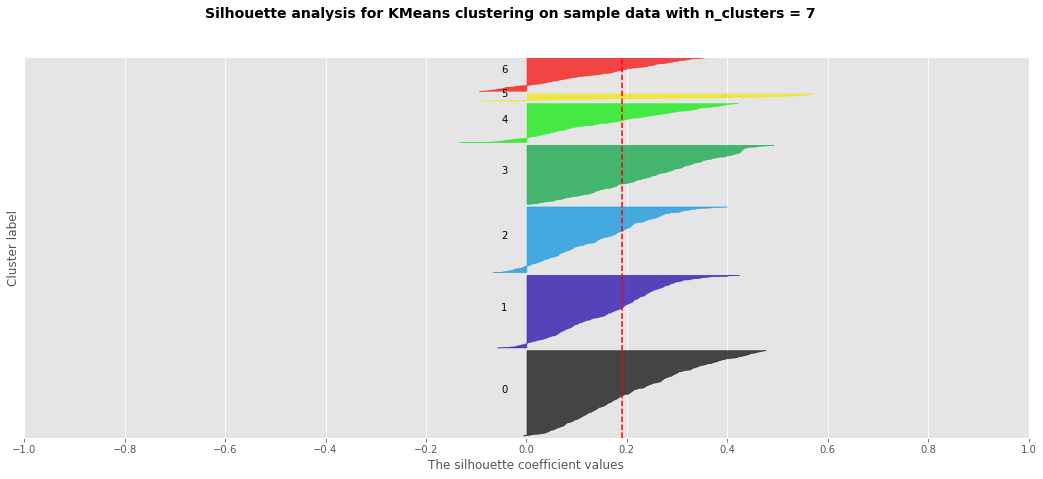

In [43]:
kmeans = kmeans[1:]
for n_clusters in range(0,len(kmeans)):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed for reproducibility.
    clusterer = kmeans[n_clusters]
    cluster_labels = clusterer.fit_predict(data_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", clusterer.n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(clusterer.n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / clusterer.n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([i/10 for i in range(-10,12,2)])

    

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % clusterer.n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### BUILD MODEL

In [50]:
kmeans = KMeans(n_clusters=2, n_jobs=NJOBS).fit(data_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[-2.49019999e-07 -6.64083793e-08  6.24494018e-08 ...  4.10186275e-10
   1.29131734e-06  1.79557909e-10]
 [-2.35918641e-07 -5.67511332e-08  5.30011139e-08 ...  4.48684461e-10
   1.30901545e-06  1.49644554e-10]]


### SAVE MODEL

In [52]:
# save the model to disk
filename = 'output/models/kmeans_002.model'
pickle.dump(kmeans, open(filename, 'wb'))